In [14]:
!pip install newspaper3k
!pip install GoogleNews
!pip install nltk
!pip install wordcloud

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from GoogleNews import GoogleNews
from newspaper import Article
from newspaper import Config
from wordcloud import WordCloud, STOPWORDS

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/arungupta/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [77]:
now = dt.date.today()
now = now.strftime('%m-%d-%Y')
yesterday = dt.date.today() - dt.timedelta(days = 30)
yesterday = yesterday.strftime('%m-%d-%Y')

nltk.download('punkt')
user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.15; rv:78.0) Gecko/20100101 Firefox/78.0'
config = Config()
config.browser_user_agent = user_agent
config.request_timeout = 10

[nltk_data] Downloading package punkt to /Users/arungupta/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [78]:
selected_stock = 'DRREDDY'
if selected_stock != '':
    print(f'Searching for and analyzing {selected_stock}, Please be patient, it might take a while...')

    #Extract News with Google News
    googlenews = GoogleNews(start=yesterday,end=now)
    googlenews.search(selected_stock)
    result = googlenews.result()
    #store the results
    df = pd.DataFrame(result)
    print(df)

Searching for and analyzing DRREDDY, Please be patient, it might take a while...
                                               title                   media  \
0  Small Molecule API Market 2022-2030, By Top Ke...            Energy Siren   
1  High Potency Active Pharmaceutical Ingredient ...            Energy Siren   
2  Fondaparinux Industry Outlook 2022: Overview, ...  The Oxford Spokesman –   
3  Viral vaccines, vector platforms may become ne...       Business Standard   
4  Oncology Biosimilars Market Future Scope, Indu...              LED Oracle   
5  Your Stocks: Dr Reddy’s Lab, GMR Infra, HDFC L...               CNBC TV18   
6  Fermenta Biotech signs deal for manufacturing ...           IndiaInfoline   
7  Dr. Reddy's Laboratories (RDY) to Release Earn...              MarketBeat   
8  Nifty Pharma joins bear markets, index sheds n...           IndiaInfoline   
9  Sensex Tanks Over 700 Points, Nifty Trades Bel...                NDTV.com   

          date                   datet

In [79]:
try:
    list =[] #creating an empty list
    for i in df.index:
        dict = {} #creating an empty dictionary to append an article in every single iteration
        article = Article(df['link'][i],config=config) #providing the link
        try:
            article.download() #downloading the article
            article.parse() #parsing the article
            article.nlp() #performing natural language processing (nlp)
        except:
            pass
            #storing results in our empty dictionary
        dict['Date']=df['date'][i]
        dict['Media']=df['media'][i]
        dict['Title']=article.title
        dict['Article']=article.text
        dict['Summary']=article.summary
        dict['Key_words']=article.keywords
        list.append(dict)
    check_empty = not any(list)
    # print(check_empty)
    if check_empty == False:
        news_df=pd.DataFrame(list) #creating dataframe
        print(news_df)

except Exception as e:
    #exception handling
    print("exception occurred:" + str(e))
    print('Looks like, there is some error in retrieving the data, Please try again or try with a different ticker.' )

          Date                   Media  \
0  3 hours ago            Energy Siren   
1  8 hours ago            Energy Siren   
2  2 hours ago  The Oxford Spokesman –   
3  3 hours ago       Business Standard   
4   2 days ago              LED Oracle   
5   3 days ago               CNBC TV18   
6   3 days ago           IndiaInfoline   
7   3 days ago              MarketBeat   
8   3 days ago           IndiaInfoline   
9   3 days ago                NDTV.com   

                                               Title  \
0  Small Molecule API Market 2022-2030, By Top Ke...   
1  High Potency Active Pharmaceutical Ingredient ...   
2  Fondaparinux Industry Outlook 2022: Overview, ...   
3  Viral vaccines, vector platforms may become ne...   
4  Oncology Biosimilars Market Future Scope, Indu...   
5  Your Stocks: Dr Reddy’s Lab, GMR Infra, HDFC L...   
6  Fermenta Biotech signs deal for manufacturing ...   
7  Dr. Reddy's Laboratories (RDY) to Release Earn...   
8  Nifty Pharma joins bear market

Positive Sentiment: 6.00
Neutral Sentiment: 1.00
Negative Sentiment: 3.00


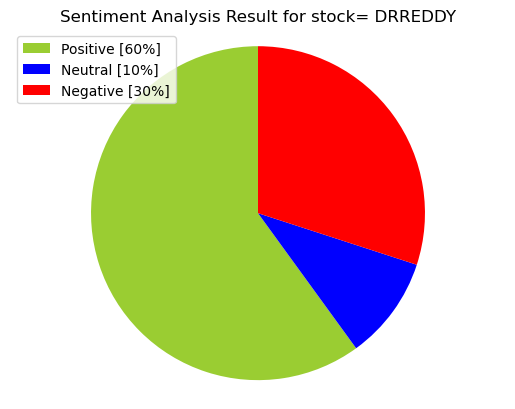

Wordcloud for DRREDDY


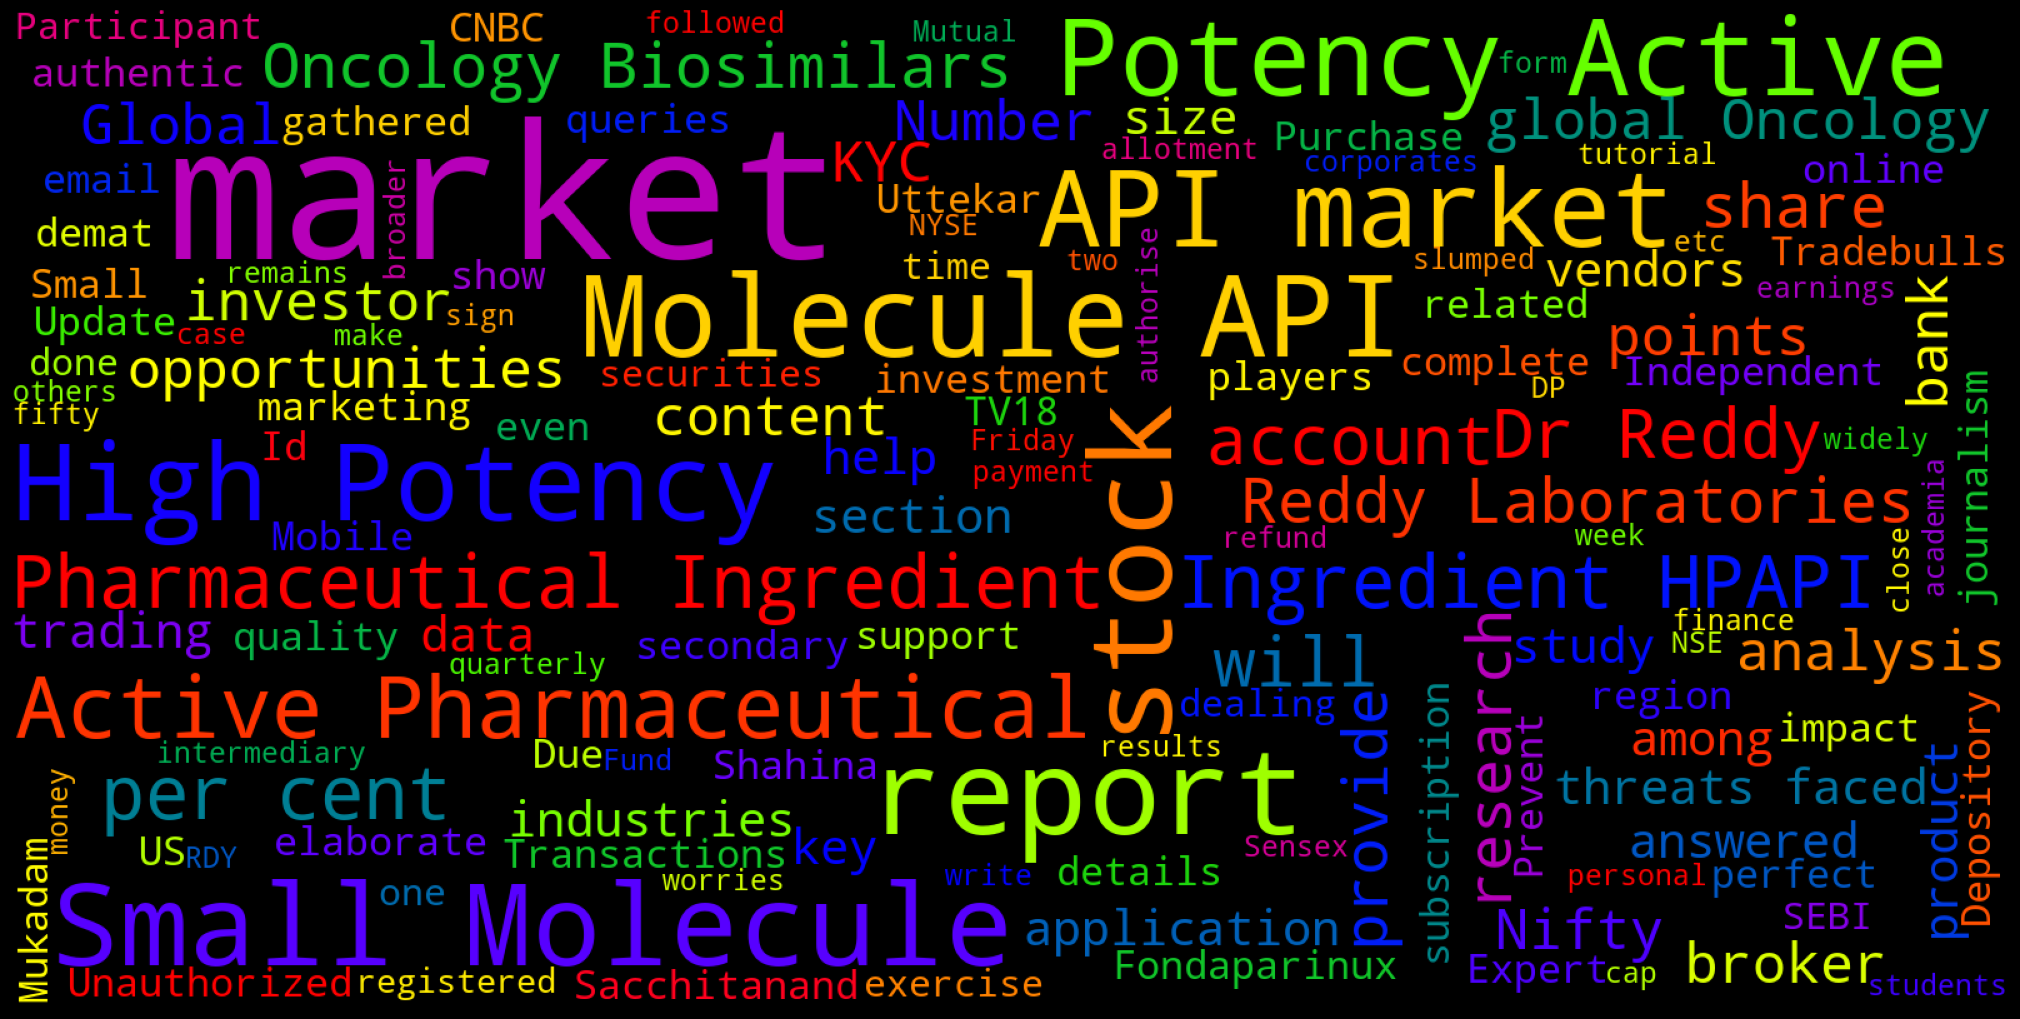

In [80]:
#Sentiment Analysis
def percentage(part,whole):
    return 100 * float(part)/float(whole)

#Assigning Initial Values
positive = 0
negative = 0
neutral = 0
#Creating empty lists
news_list = []
neutral_list = []
negative_list = []
positive_list = []

#Iterating over the tweets in the dataframe
for news in news_df['Summary']:
    news_list.append(news)
    analyzer = SentimentIntensityAnalyzer().polarity_scores(news)
    neg = analyzer['neg']
    neu = analyzer['neu']
    pos = analyzer['pos']
    comp = analyzer['compound']

    if neg > pos:
        negative_list.append(news) #appending the news that satisfies this condition
        negative += 1 #increasing the count by 1
    elif pos > neg:
        positive_list.append(news) #appending the news that satisfies this condition
        positive += 1 #increasing the count by 1
    elif pos == neg:
        neutral_list.append(news) #appending the news that satisfies this condition
        neutral += 1 #increasing the count by 1

positive = percentage(positive, len(news_df)) #percentage is the function defined above
negative = percentage(negative, len(news_df))
neutral = percentage(neutral, len(news_df))

#Converting lists to pandas dataframe
news_list = pd.DataFrame(news_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
#using len(length) function for counting
print("Positive Sentiment:", '%.2f' % len(positive_list), end='\n')
print("Neutral Sentiment:", '%.2f' % len(neutral_list), end='\n')
print("Negative Sentiment:", '%.2f' % len(negative_list), end='\n')

#Creating PieCart
labels = ['Positive ['+str(round(positive))+'%]' , 'Neutral ['+str(round(neutral))+'%]','Negative ['+str(round(negative))+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for stock= "+selected_stock+"" )
plt.axis('equal')
plt.show()

# Word cloud visualization
def word_cloud(text):
    stopwords = set(STOPWORDS)
    allWords = ' '.join([nws for nws in text])
    wordCloud = WordCloud(background_color='black',width = 1600, height = 800,stopwords = stopwords,min_font_size = 20,max_font_size=150,colormap='prism').generate(allWords)
    fig, ax = plt.subplots(figsize=(20,10), facecolor='k')
    plt.imshow(wordCloud)
    ax.axis("off")
    fig.tight_layout(pad=0)
    plt.show()

print('Wordcloud for ' + selected_stock)
word_cloud(news_df['Summary'].values)